# Задача регрессии

Используется "игрушечный пример": датасет получен в обобщением результатов анкетирования студентов 1-2 курсов. Студенты должны были указать свой рост в см,	размер обуви,	массу в кг,	желаемую зарплату в тыс. руб.,	желаемое число детей. В анкете *специально* присутствовали переменные, которые, как можно предположить исходя из здравого смысла, не связаны с другими.

Загрузка данных.

In [ ]:
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving correg.csv to correg.csv
User uploaded file "correg.csv" with length 2218 bytes


Импорт необходимых модулей

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression as lm

#Разведочный анализ датасета и визуализация данных

Считывание данных в датафрейм, информация о нем и просмотр его верхней части

In [ ]:
df = pd.read_csv('correg.csv', sep=";", encoding='utf_8')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Рост, см                      126 non-null    int64
 1   Размер обуви                  126 non-null    int64
 2   Масса, кг                     126 non-null    int64
 3   Желаемая зарплата, тыс. руб.  126 non-null    int64
 4   Желаемое число детей          126 non-null    int64
dtypes: int64(5)
memory usage: 5.0 KB


,"Рост, см",Размер обуви,"Масса, кг","Желаемая зарплата, тыс. руб.",Желаемое число детей
0,165,38,55,130,2
1,166,38,58,100,2
2,175,43,65,150,1
3,174,39,55,95,4
4,168,38,42,40,2
5,168,38,47,150,2
6,167,37,47,90,1
7,173,40,60,125,2
8,156,38,55,150,3
9,167,36,59,100,2


Просмотр нижней части датафрейма

In [ ]:
df.tail(n=10)

,"Рост, см",Размер обуви,"Масса, кг","Желаемая зарплата, тыс. руб.",Желаемое число детей
116,176,40,71,500,2
117,170,37,57,100,2
118,172,39,67,100,2
119,168,39,75,100,2
120,157,36,49,450,4
121,170,39,63,500,2
122,164,37,58,500,2
123,180,43,76,50,2
124,166,41,60,60,3
125,160,37,54,80,1


Вывод описательной статистики по датасету

In [ ]:
df.describe()

,"Рост, см",Размер обуви,"Масса, кг","Желаемая зарплата, тыс. руб.",Желаемое число детей
count,126.000000,126.000000,126.00000,126.000000,126.000000
mean,166.420635,38.507937,57.81746,95.357143,2.214286
std,8.889862,2.744437,11.96622,96.143348,0.825660
min,147.000000,34.000000,40.00000,7.000000,0.000000
25%,160.250000,37.000000,49.00000,50.000000,2.000000
50%,165.000000,38.000000,55.00000,70.000000,2.000000
75%,172.000000,40.000000,63.00000,100.000000,2.000000
max,195.000000,50.000000,107.00000,500.000000,7.000000


Парные диаграммы №1

<Figure size 1350x1350 with 0 Axes>

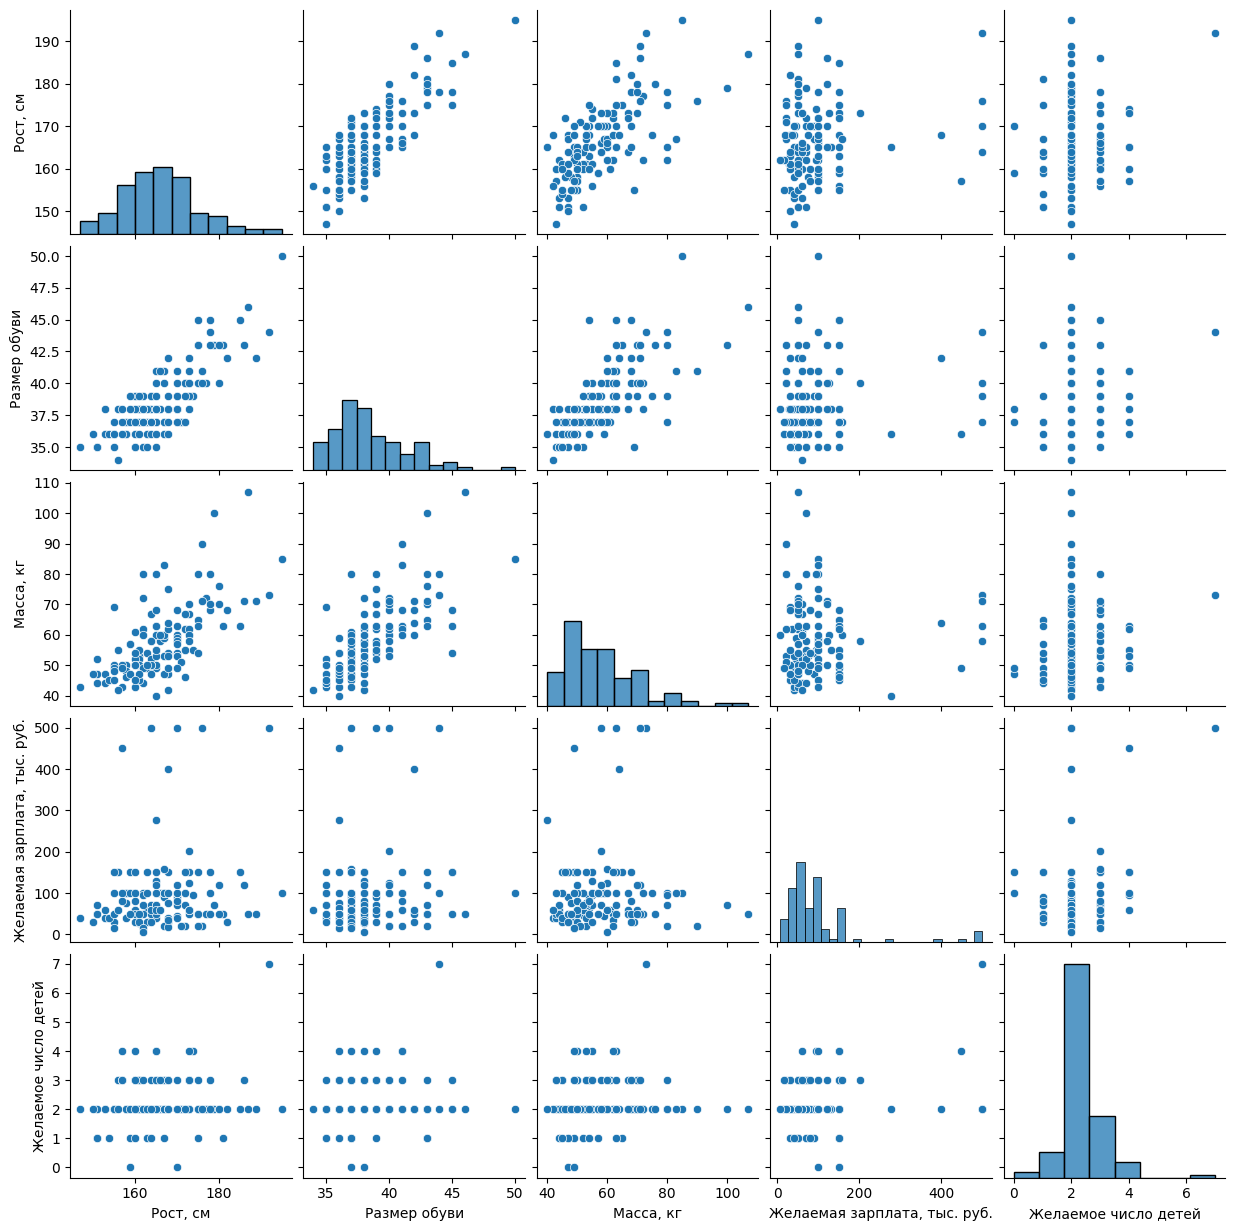

In [ ]:
plt.figure(figsize=(15,15), dpi=90)
sns.pairplot(df, kind="scatter")

Парные диаграммы №2

<Figure size 1350x1350 with 0 Axes>

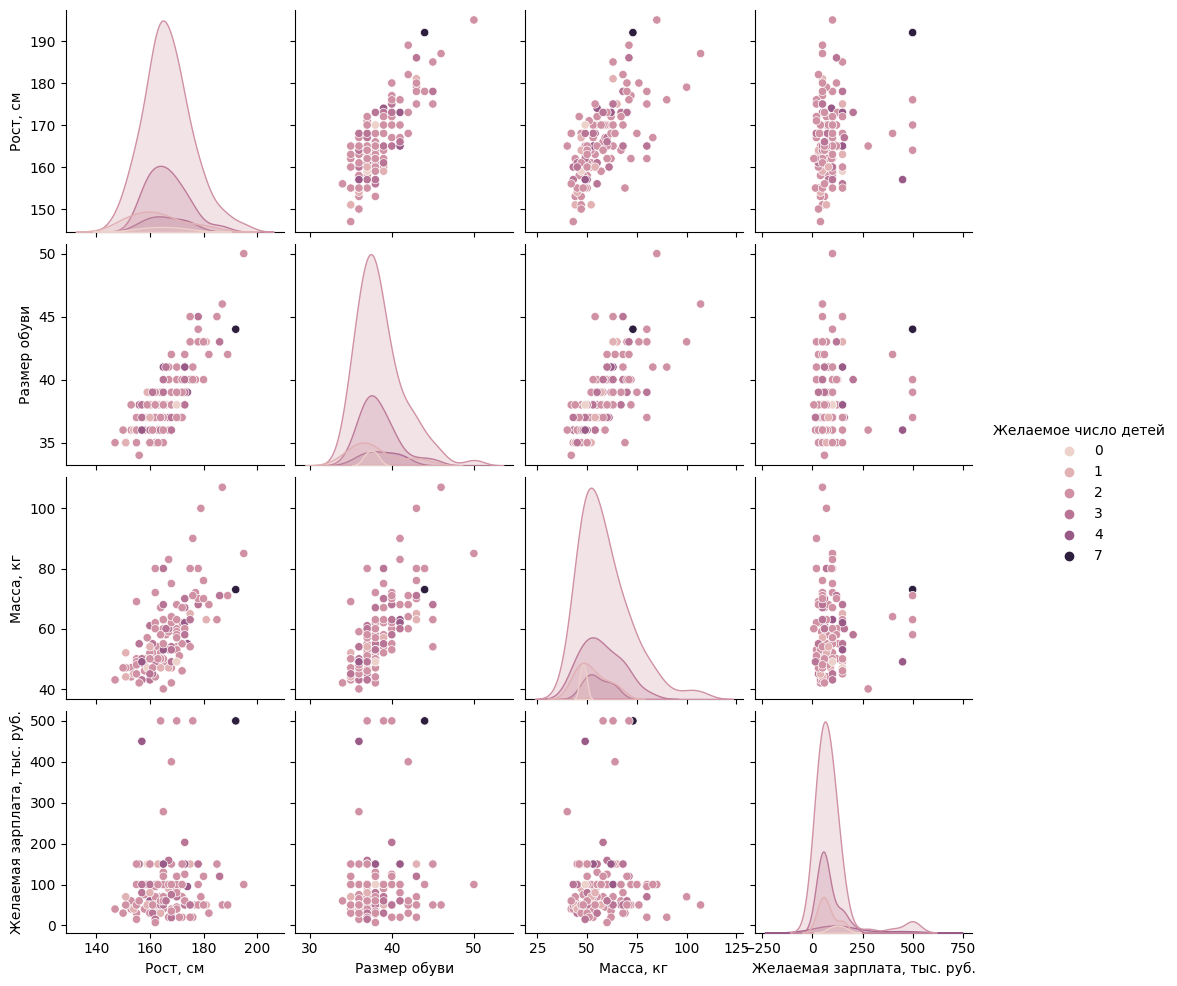

In [ ]:
plt.figure(figsize=(15,15), dpi=90)
sns.pairplot(df, kind="scatter", hue = "Желаемое число детей")

Корреляционная матрица

In [ ]:
df.corr(method='pearson')


,"Рост, см",Размер обуви,"Масса, кг","Желаемая зарплата, тыс. руб.",Желаемое число детей
"Рост, см",1.000000,0.808628,0.656953,0.174031,0.179447
Размер обуви,0.808628,1.000000,0.715136,0.114853,0.128106
"Масса, кг",0.656953,0.715136,1.000000,0.076492,0.099537
"Желаемая зарплата, тыс. руб.",0.174031,0.114853,0.076492,1.000000,0.252588
Желаемое число детей,0.179447,0.128106,0.099537,0.252588,1.000000


Диаграмма корреляции

<Axes: >

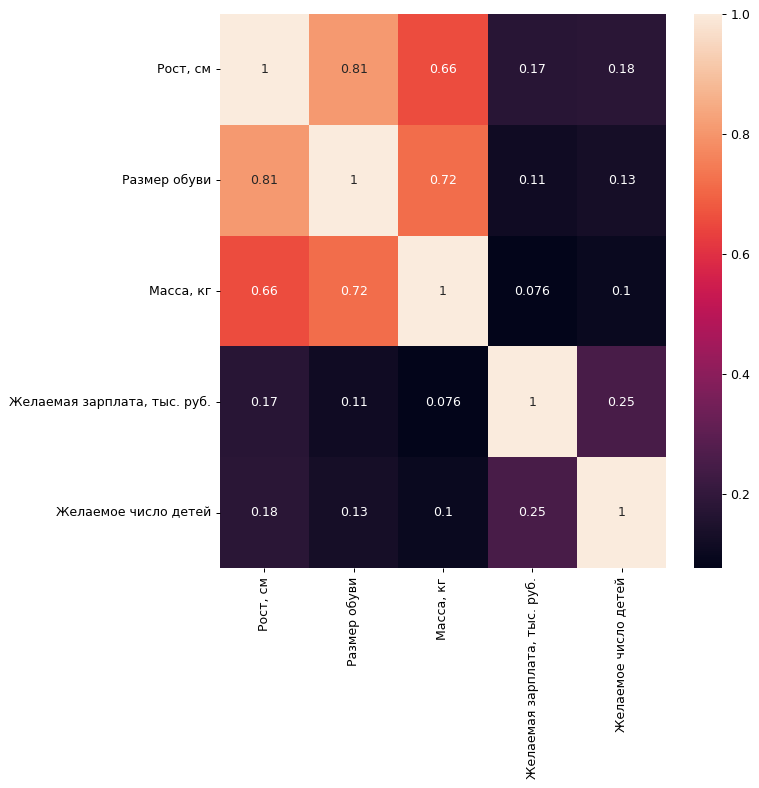

In [ ]:
plt.figure(figsize=(8,8), dpi=90)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

Диаграмма рассеяния

Text(0, 0.5, 'Размер обуви')

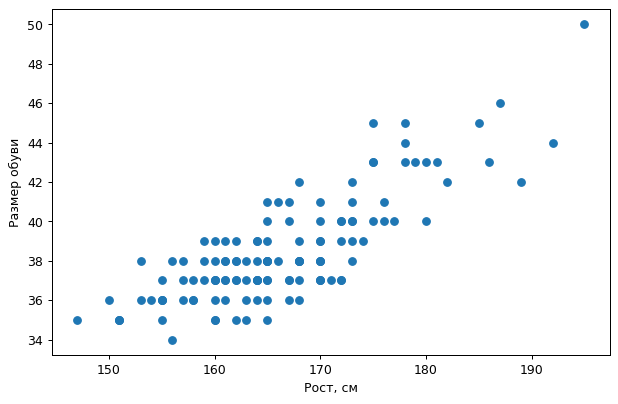

In [ ]:
plt.figure(figsize=(8,5), dpi=90)
plt.scatter(df['Рост, см'], df['Размер обуви'])
plt.xlabel('Рост, см')
plt.ylabel('Размер обуви')

#Построение модели линейной регрессии

$y = a_0 + a_1x$ - уравнение прямой

Выделение зависимой (целевой) переменной y

In [ ]:
y = df['Размер обуви']

y=y.values

Выделение независимой переменной-предиктора X

In [ ]:
X = pd.DataFrame(df['Рост, см'])
print(X.shape)
X.head(20)

(126, 1)


,"Рост, см"
0,165
1,166
2,175
3,174
4,168
5,168
6,167
7,173
8,156
9,167


Разобъем датасет на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Строим регрессионную (линейную) модель по обучающей выборке:

In [ ]:
model = lm()
model.fit(X_train, y_train)

print('a1:', *model.coef_)
print('a0: {:.2f}'.format(model.intercept_))

a1: 0.24045564877842854
a0: -1.51


Диаграмма рассеяния данных обучающей выборки с полученной прямой

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0, 0.5, 'Размер обуви')

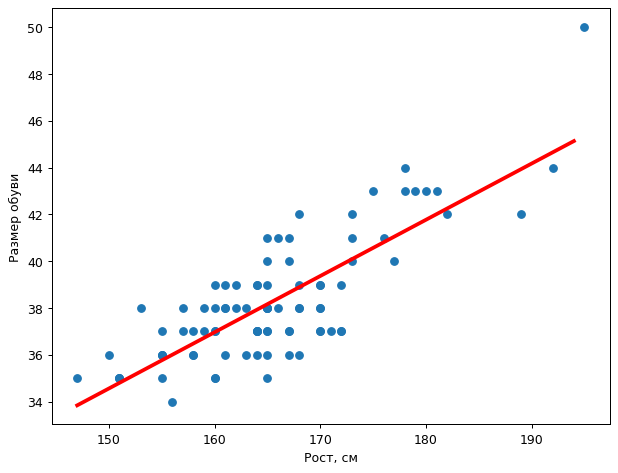

In [ ]:
plt.figure(figsize=(8,6), dpi=90)
plt.scatter(X_train, y_train)
x  = np.arange(np.min(X_train).values, np.max(X_train).values,  1)
y = model.coef_[0]*x + model.intercept_
plt.plot(x,y, color = 'red', lw = 3)
plt.xlabel('Рост, см')
plt.ylabel('Размер обуви')

Прогноз на тестовой выборке

In [ ]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)): print('i=', i, '| Размер обуви факт=', y_test[i],'| Размер обуви предсказ=', y_pred[i],'| Размер обуви дельта=', y_test[i]-y_pred[i])

i= 0 | Размер обуви факт= 38 | Размер обуви предсказ= 36.0006299139887 | Размер обуви дельта= 1.9993700860112966
i= 1 | Размер обуви факт= 37 | Размер обуви предсказ= 39.3670089968867 | Размер обуви дельта= -2.367008996886703
i= 2 | Размер обуви факт= 38 | Размер обуви предсказ= 40.08837594322199 | Размер обуви дельта= -2.0883759432219904
i= 3 | Размер обуви факт= 40 | Размер обуви предсказ= 39.3670089968867 | Размер обуви дельта= 0.6329910031132968
i= 4 | Размер обуви факт= 38 | Размер обуви предсказ= 38.88609769932985 | Размер обуви дельта= -0.8860976993298522
i= 5 | Размер обуви факт= 35 | Размер обуви предсказ= 37.68381945543771 | Размер обуви дельта= -2.683819455437707
i= 6 | Размер обуви факт= 41 | Размер обуви предсказ= 39.3670089968867 | Размер обуви дельта= 1.6329910031132968
i= 7 | Размер обуви факт= 37 | Размер обуви предсказ= 37.44336380665928 | Размер обуви дельта= -0.44336380665927777
i= 8 | Размер обуви факт= 40 | Размер обуви предсказ= 40.08837594322199 | Размер обуви д

Оценим качество предсказания одним числом:

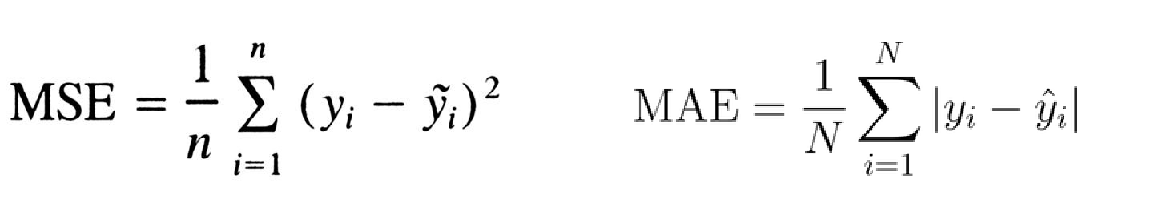

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE_test = {:.3f}'.format(
        np.sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(y_pred,  y_pred - y_test,
            c='green', marker='o', label='Тестовые данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=20, xmax=50, lw=2, color='red')


NameError: name 'np' is not defined

#Модель линейной регрессии с несколькими предикторами

Построим более сложную регрессионную модель $y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4 + ...$ - уравнение прямой в многомерном пространстве.

Выделение зависимой (целевой) переменной y



In [ ]:
y = df['Размер обуви']

y=y.values

Выделение независимых переменных-предикторов X

In [ ]:
X = df.drop(['Размер обуви'], axis=1)
print(X.shape)
X.head(20)

(126, 4)


,"Рост, см","Масса, кг","Желаемая зарплата, тыс. руб.",Желаемое число детей
0,165,55,130,2
1,166,58,100,2
2,175,65,150,1
3,174,55,95,4
4,168,42,40,2
5,168,47,150,2
6,167,47,90,1
7,173,60,125,2
8,156,55,150,3
9,167,59,100,2


Разобъем датасет на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Строим регрессионную (линейную) модель по обучающей выборке:

In [ ]:
model = lm()
model.fit(X_train, y_train)

print('a[1-...]: ', model.coef_)
print('a0: {:.2f}'.format(model.intercept_))

a[1-...]:  [ 0.16528956  0.08549139 -0.00049403  0.09815083]
a0: 5.86


Сделаем прогноз на тестовой выборке

In [ ]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)): print('i=', i, '| Размер обуви факт=', y_test[i],'| Размер обуви предсказ=', y_pred[i],'| Размер обуви дельта=', y_test[i]-y_pred[i])

i= 0 | Размер обуви факт= 38 | Размер обуви предсказ= 36.56933812767897 | Размер обуви дельта= 1.430661872321032
i= 1 | Размер обуви факт= 37 | Размер обуви предсказ= 38.66860136327625 | Размер обуви дельта= -1.6686013632762524
i= 2 | Размер обуви факт= 38 | Размер обуви предсказ= 40.45456013174718 | Размер обуви дельта= -2.4545601317471792
i= 3 | Размер обуви факт= 40 | Размер обуви предсказ= 39.2373995003145 | Размер обуви дельта= 0.7626004996854974
i= 4 | Размер обуви факт= 38 | Размер обуви предсказ= 38.41888212125665 | Размер обуви дельта= -0.4188821212566509
i= 5 | Размер обуви факт= 35 | Размер обуви предсказ= 37.225458617809004 | Размер обуви дельта= -2.2254586178090037
i= 6 | Размер обуви факт= 41 | Размер обуви предсказ= 39.9312111958221 | Размер обуви дельта= 1.068788804177899
i= 7 | Размер обуви факт= 37 | Размер обуви предсказ= 39.62738101954721 | Размер обуви дельта= -2.627381019547208
i= 8 | Размер обуви факт= 40 | Размер обуви предсказ= 39.72091751233763 | Размер обуви 

Оценим качество предсказания с помощью *RMSE*

RMSE_test = 1.649


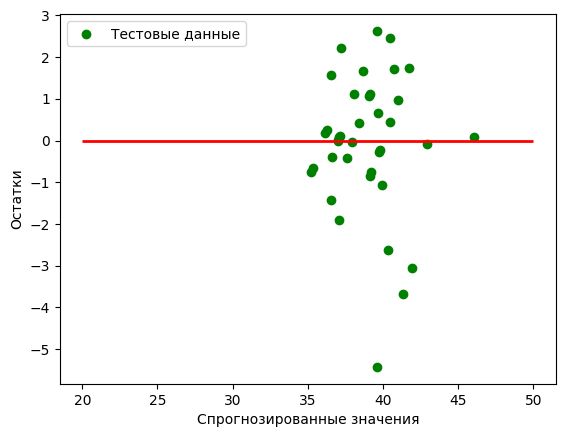

In [ ]:
print('RMSE_test = {:.3f}'.format(
        np.sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(y_pred,  y_pred - y_test,
            c='green', marker='o', label='Тестовые данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=20, xmax=50, lw=2, color='red')